In [26]:
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = fetch_20newsgroups()
df.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
X = df.data
Y = df.target

In [5]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

X = [word_tokenize(i) for i in X]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, random_state=1)


In [8]:
freq_count = {}
for doc in x_train:
  for word in doc:
    if (word in freq_count):
      freq_count[word] += 1
    elif (stop_words.count(word.lower()) == 0 and len(word) != 2 and len(word) != 1 and word != '...' and word != "n't" and word != '....' and word != "'AX" and word != "'re" and word != "'ve"):
      freq_count[word] = 1

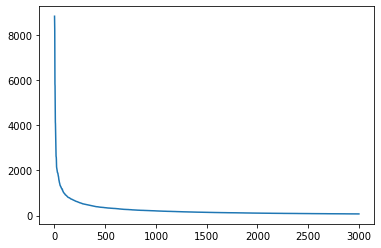

In [11]:
import operator
freq_count = dict( sorted(freq_count.items(), key=operator.itemgetter(1),reverse=True))


i = 1
val = []
ind = []
for value in freq_count.values():
  ind.append(i)
  val.append(value)
  i = i + 1
  if i == 3000:
    break


plt.plot(ind,val)

In [12]:
features = list(freq_count)[10:4000]

In [13]:
def data_trans(X, features):
  X_trans = np.zeros((len(X), len(features)))

  for i in range(0, len(X)):
    dic = dict()
    for word in X[i]:
      if word in dic.keys():
        dic[word] += 1
      else:
        dic[word] = 1

    for j in range(0, len(features)):
      if features[j] in dic.keys():
        X_trans[i][j] = dic[features[j]]

  return X_trans


x_train = data_trans(x_train,features)
x_test = data_trans(x_test, features)

1. Naive Bayes

In [16]:
clf= MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.8119476846942383

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       114
           1       0.58      0.74      0.65       152
           2       0.93      0.57      0.71       139
           3       0.61      0.73      0.66       152
           4       0.70      0.79      0.74       138
           5       0.86      0.75      0.80       153
           6       0.72      0.80      0.76       147
           7       0.78      0.84      0.81       137
           8       0.78      0.87      0.82       131
           9       0.88      0.96      0.92       135
          10       0.97      0.88      0.92       136
          11       0.95      0.92      0.93       145
          12       0.81      0.68      0.74       157
          13       0.90      0.89      0.90       151
          14       0.91      0.88      0.89       155
          15       0.90      0.86      0.88       159
          16       0.83      0.91      0.87       140
          17       0.94    

In [22]:
print(confusion_matrix(y_test, y_pred))

[[ 91   0   0   0   0   0   0   0   1   0   0   0   0   2   0   5   1   0
    1  13]
 [  0 112   3  12   7   6   2   1   2   0   0   1   3   0   2   0   0   0
    0   1]
 [  0  20  79  22   6   7   4   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   5   2 111  16   2   5   2   2   0   0   0   6   1   0   0   0   0
    0   0]
 [  0   3   0   9 109   0  10   2   2   0   1   0   0   1   0   0   0   0
    1   0]
 [  0  25   0   5   2 115   1   1   1   1   0   0   1   1   0   0   0   0
    0   0]
 [  1   2   0   6   1   0 118   4   2   1   1   0   5   2   2   0   0   1
    1   0]
 [  0   1   0   1   0   0   5 115   8   1   0   0   4   1   1   0   0   0
    0   0]
 [  1   0   1   0   0   0   5   8 114   0   0   0   0   0   0   0   2   0
    0   0]
 [  0   1   0   1   0   0   0   1   0 130   1   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   2   2   3   6 120   0   0   1   0   0   0   0
    0   1]
 [  0   2   0   0   0   0   1   0   1   0   0 133   0   1   2   0

2. Support Vector Machines

In [23]:
clf2 = SVC(kernel='linear', C=100000)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
clf2.score(x_test, y_test)

0.7705903145987981

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       114
           1       0.64      0.66      0.65       152
           2       0.72      0.78      0.74       139
           3       0.62      0.69      0.65       152
           4       0.78      0.73      0.75       138
           5       0.76      0.76      0.76       153
           6       0.76      0.73      0.74       147
           7       0.68      0.74      0.71       137
           8       0.71      0.76      0.74       131
           9       0.73      0.87      0.79       135
          10       0.87      0.81      0.84       136
          11       0.88      0.92      0.90       145
          12       0.65      0.62      0.64       157
          13       0.78      0.76      0.77       151
          14       0.91      0.83      0.86       155
          15       0.89      0.82      0.86       159
          16       0.88      0.86      0.87       140
          17       0.93    

In [25]:
print(confusion_matrix(y_test, y_pred))

[[ 86   0   0   0   0   0   0   1   1   3   0   1   0   1   2   1   2   1
    4  11]
 [  0 101  14   8   3  13   0   1   1   1   2   3   2   1   1   0   0   0
    1   0]
 [  0   7 108   9   1   6   1   1   0   3   1   0   2   0   0   0   0   0
    0   0]
 [  1   7   7 105  10   4   4   2   1   2   0   1   6   0   0   1   1   0
    0   0]
 [  0   2   3  14 101   2   6   1   1   2   0   0   6   0   0   0   0   0
    0   0]
 [  0  11   4   7   2 117   0   1   1   1   1   1   2   4   0   0   0   0
    0   1]
 [  0   5   2   7   2   2 107   2   6   0   3   2   6   2   0   0   0   0
    1   0]
 [  0   0   2   1   1   0   6 101   7   1   2   0   9   1   1   1   0   0
    2   2]
 [  0   0   0   0   1   0   4  12 100   1   1   1   2   2   2   1   0   0
    2   2]
 [  0   0   0   2   0   0   2   2   3 117   5   0   1   0   0   0   0   0
    3   0]
 [  0   0   3   2   0   0   0   1   4   6 110   1   2   4   0   0   1   1
    0   1]
 [  0   2   0   0   0   0   0   1   1   1   0 134   2   2   0   0

3. K nearest Neighbours

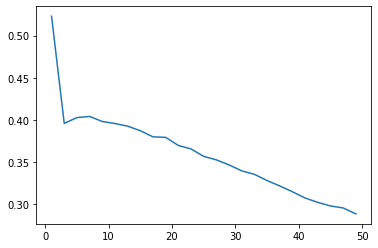

In [28]:
x_axis = []
k_scores = []
for k in range(1,50, 2):
  x_axis.append(k)
  clf = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())
    

plt.plot(x_axis, k_scores)
plt.show()

In [29]:
optimal_k = x_axis[k_scores.index(max(k_scores))]
optimal_k

1

In [34]:
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)


0.5630965005302226